In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the API endpoint and parameters
url = "https://api.fda.gov/food/enforcement.json?search=report_date:[20200101+TO+20240804]&limit=500"

# Send a GET request to the API
response = requests.get(url)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Extract the list of results (recalls)
    recalls = data.get('results', [])
    
    # Create a DataFrame from the list of recall records
    recall_df = pd.DataFrame(recalls)
    
    # Save the DataFrame to a CSV file
    recall_df.to_csv('output_data/fda_food_enforcement_data.csv', index=False)

In [2]:

clean_df = recall_df.rename(columns={"status": "Status", 
                                     "city": "City",
                                     "state": "State",
                                     "country":"Country",
                                     "classification":"Classification",
                                     "openfda":"Open FDA",
                                     "product_type":"Product Type",
                                     "event_id":"Event ID",
                                     "recalling_firm":"Recalling Firm",
                                     "address_1":"Address 1",
                                     "address_2":"Address 2",
                                     "postal_code":"Postal Code",
                                     "voluntary_mandated":"Voluntary Mandated",
                                     "initial_firm_notification":"Initial Firm Notification",
                                     "distribution_pattern":"Distribution Pattern",
                                     "recall_number":"Recall Number",
                                     "product_description":"Product Description",
                                     "product_quantity":"Product Quantity",
                                     "reason_for_recall":"Reason for Recall",
                                     "recall_initiation_date":"Recall Initiation Date",
                                     "center_classification_date":"Center Classification Date",
                                     "termination_date":"Termination Date",
                                     "report_date":"Report Date",
                                     "code_info":"Code Info",
                                     "more_code_info":"More Code Info",
                                    
                                     })

clean_df.head()

,Status,City,State,Country,Classification,Open FDA,Product Type,Event ID,Recalling Firm,Address 1,...,Recall Number,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Center Classification Date,Termination Date,Report Date,Code Info,More Code Info
0,Terminated,Rancho Dominguez,CA,United States,Class III,{},Food,85253,"Organic By Nature, Inc.",2610 Homestead Pl,...,F-0904-2020,Pure Planet Organic Parasite Cleanse; Net Wt....,xx,Firm was notified by supplier that Organic Gro...,20200224,20200413,20210202,20200401,Lot codes: 72746,
1,Terminated,Brooklyn,NY,United States,Class III,{},Food,85364,Rong Shing Trading NY Inc,47 Bridgewater St # 57,...,F-0921-2020,"XinXing Dried Plum, Net Wt. 5.3 oz.(150g)",unknown,"Product contains dried peaches, but front labe...",20200401,20200424,20210318,20200506,UPC CODE: 6868978724496 BEST BEFORE: 11/15/2021,NaN
2,Terminated,Monterey,CA,United States,Class I,{},Food,89381,Dole Fresh Vegetables Inc,2959 Salinas Hwy,...,F-0757-2022,Marketside 12oz Classic Salad UPC:6-81131-328...,,Harvest equipment used in harvesting raw icebe...,20220106,20220222,20220322,20220302,Product codes beginning with B - Best by Dates...,
3,Terminated,Lovell,WY,United States,Class II,{},Food,90158,"Queen Bee Gardens, LLC",262 E Main St,...,F-1472-2022,Honey Caramels Blue Raspberry. Product availab...,171 pieces,Products may potentially contain one or more o...,20220428,20220719,20230117,20220727,None,NaN
4,Terminated,Nof Ha-Galil,,Israel,Class I,{},Food,90105,ELITE CONFECTIONERY LTD,Nazareth-Ilit,...,F-1233-2022,ELITE MILK CHOCOLATE COATED RICE CAKES UPC:81...,unknown,Potential contamination with Salmonella,20220428,20220604,20221103,20220615,All lots,


## Which firms have the most recalls?

In [3]:
recalling_firm_df = clean_df["Recalling Firm"].unique()

recalling_firm_count_df = len(recalling_firm_df)

#print(recalling_firm_count_df)
print("Total amount of unique Recalling Firms associated to the FDA Recalls is "  + str(recalling_firm_count_df) )

Total amount of unique Recalling Firms associated to the FDA Recalls is 295


In [4]:
# Get top 15 recalling firms
firm_count_df = clean_df["Recalling Firm"].value_counts().head(15)

print(firm_count_df)

Recalling Firm
FRESH IDEATION FOOD GROUP, LLC dba Fresh Creative Cuisine    34
Newly Weds Foods, Inc.                                       13
Fresh Express Incorporated                                    9
Vitality Works, Inc                                           9
Wegmans Food Markets, Inc.                                    6
ELITE CONFECTIONERY LTD                                       6
The JM Smucker Company LLC                                    6
Giant Eagle                                                   6
Lemonland Food Corp                                           6
Lyons Magnus, Inc                                             6
Banner Smoked Fish Inc.                                       5
Renaissance Food Group                                        5
ICE CREAM HOUSE                                               5
Abbott Laboratories                                           5
Dole Fresh Vegetables Inc                                     5
Name: count, dtype: int64

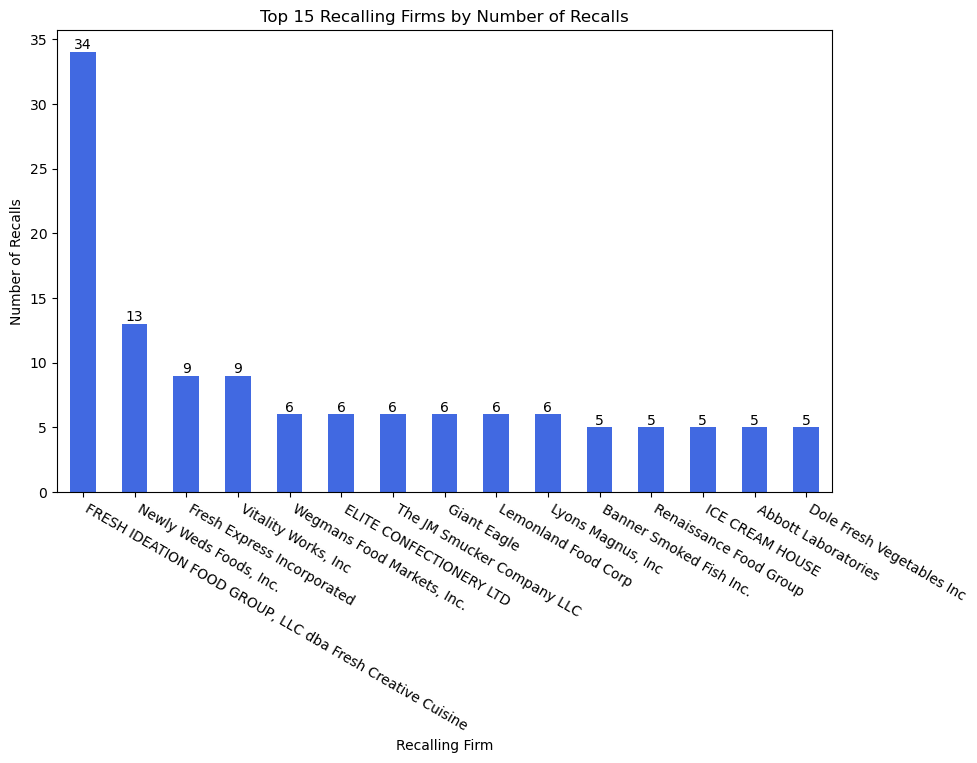

In [5]:
# Plot the number of recalls by the top 15 recalling firms
ax = firm_count_df.plot(kind="bar", 
                   color = "royalblue",
                   figsize=(10, 6), 
                   title="Top 15 Recalling Firms by Number of Recalls")
plt.xlabel("Recalling Firm")
plt.ylabel("Number of Recalls")
plt.xticks(rotation=-30, ha="left")

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        # Determine the label position: top or bottom of the bar
        if height > 0:
            y_offset = height  
            va = "bottom"  
        else:
            y_offset = height 
            va = "top"  
        
        # Add a text label, formatted to two decimal places
        ax.text(bar.get_x() + bar.get_width() / 2, y_offset, 
                f'{height}', 
                ha="center", va=va)


plt.savefig("output_data/Top 15 Recalling Firms by Number of Recalls.png")
plt.show()


In [6]:
# Get the top 15 recalling firms
top_firms = clean_df["Recalling Firm"].value_counts().head(15).index

# Filter the dataset to include only the top 15 firms
filtered_df = clean_df[clean_df["Recalling Firm"].isin(top_firms)]

# Group the data by firm and status
grouped_data = filtered_df.groupby(["Recalling Firm", 'Classification']).size().unstack(fill_value=0)

# Create a single subplot
fig = go.Figure()

# Stacked bar plot for status breakdown
for status in grouped_data.columns:
    fig.add_trace(
        go.Bar(x=grouped_data.index, y=grouped_data[status], name=status)
    )

# Update layout for a better presentation
fig.update_layout(
    barmode="stack",
    height=700,
    width=1000,
    title_text="Classification Breakdown by Top 15 Recalling Firms",
    showlegend=True
)

fig.update_xaxes(title_text="Recalling Firm")